In [27]:
import pandas as pd
import seaborn as sb
import os

In [28]:
data = pd.read_csv('btc_reddit_sentiment_1.csv' , sep=';')
data1 = pd.read_csv('BTC-USD.csv')

In [29]:
#day & result
data["Date"] = data["date"]

average_sentiment = (data.groupby([data['Date']], as_index=False)["sentiment"].mean())
print(average_sentiment)

data1["Result"] = (data1["Close"] - data1["Open"])
data1["Percentage_change"] = ((data1["Close"] - data1["Open"]) / data1["Open"]) * 100

start_date = '2021-01-01'
end_date = '2021-08-16'

mask = (data1['Date'] >= start_date) & (data1['Date'] <= end_date)
all_the_dates = data1.loc[mask]
all_the_dates1 = all_the_dates[["Date", "Result"]]
all_the_dates2 = all_the_dates[["Date", "Percentage_change"]]
print(all_the_dates1)

concatenated = all_the_dates1.merge(average_sentiment, on='Date', how='left')
print(concatenated)

           Date  sentiment
0    2021-01-01   0.321053
1    2021-01-02   0.163158
2    2021-01-03   0.323864
3    2021-01-04   0.225989
4    2021-01-05   0.234637
..          ...        ...
207  2021-08-12   0.628141
208  2021-08-13   0.526596
209  2021-08-14   0.513228
210  2021-08-15   0.285714
211  2021-08-16   0.424731

[212 rows x 2 columns]
            Date       Result
2192  2021-01-01   380.142578
2193  2021-01-02  2750.812500
2194  2021-01-03   652.615235
2195  2021-01-04  -839.035156
2196  2021-01-05  2015.388672
...          ...          ...
2415  2021-08-12 -1148.589843
2416  2021-08-13  3353.628907
2417  2021-08-14  -713.742187
2418  2021-08-15   -49.664063
2419  2021-08-16 -1015.476563

[228 rows x 2 columns]
           Date       Result  sentiment
0    2021-01-01   380.142578   0.321053
1    2021-01-02  2750.812500   0.163158
2    2021-01-03   652.615235   0.323864
3    2021-01-04  -839.035156   0.225989
4    2021-01-05  2015.388672   0.234637
..          ...          ...

In [30]:
#sb.lineplot(x="Date", y="Result", hue="Low", data=all_the_dates1)

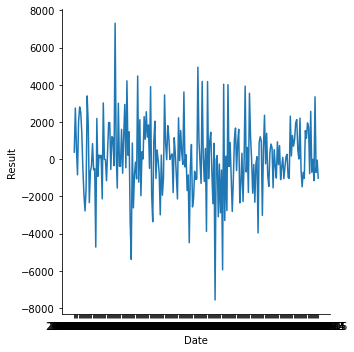

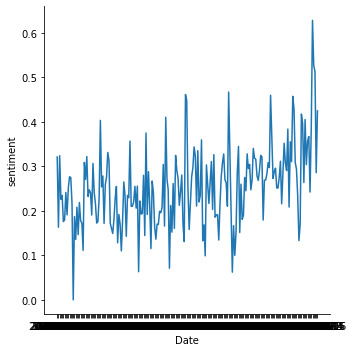

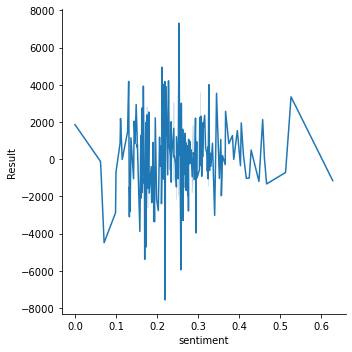

In [31]:
#day & result
sb.relplot(x="Date", y="Result", kind="line", data=all_the_dates1)
sb.relplot(x="Date", y="sentiment", kind="line", data=average_sentiment)
sb.relplot(x="sentiment", y="Result", kind="line", data=concatenated)

In [32]:
#week & result
data['Date'] = pd.to_datetime(data['Date'])

week = data.groupby(pd.Grouper(key="Date", freq="1W")).mean()
week1 = week[["sentiment"]]
print(week1)

all_the_dates1['Date'] = pd.to_datetime(all_the_dates1['Date'])

allth = all_the_dates1.groupby(pd.Grouper(key="Date", freq="1W")).mean()
print(allth)

concatenated1 = allth.merge(week1, on='Date', how='left')
print(concatenated1)

            sentiment
Date                 
2021-01-03   0.267986
2021-01-10   0.213650
2021-01-17   0.184727
2021-01-24   0.201058
2021-01-31   0.253956
2021-02-07   0.236626
2021-02-14   0.266403
2021-02-21   0.182714
2021-02-28   0.187597
2021-03-07   0.253121
2021-03-14   0.201945
2021-03-21   0.206597
2021-03-28   0.283117
2021-04-04   0.202408
2021-04-11   0.188498
2021-04-18   0.241142
2021-04-25   0.239607
2021-05-02   0.278846
2021-05-09   0.266412
2021-05-16   0.236985
2021-05-23   0.237145
2021-05-30   0.217920
2021-06-06   0.309668
2021-06-13   0.186567
2021-06-20   0.232541
2021-06-27   0.298272
2021-07-04   0.276235
2021-07-11   0.322455
2021-07-18   0.269627
2021-07-25   0.312256
2021-08-01   0.310478
2021-08-08   0.330502
2021-08-15   0.422704
2021-08-22   0.424731
                 Result
Date                   
2021-01-03  1261.190104
2021-01-10   786.892020
2021-01-17  -351.005022
2021-01-24  -495.090402
2021-01-31     0.027065
2021-02-07   829.364955
2021-02-14  1415

/var/folders/yf/97lsvtr12qg5vtp26f5f03040000gn/T/ipykernel_1205/3132279292.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_the_dates1['Date'] = pd.to_datetime(all_the_dates1['Date'])


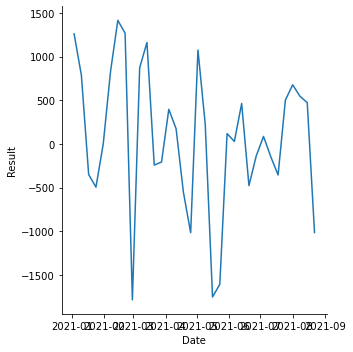

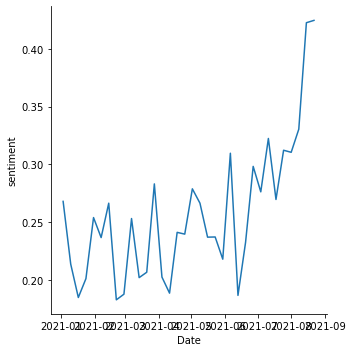

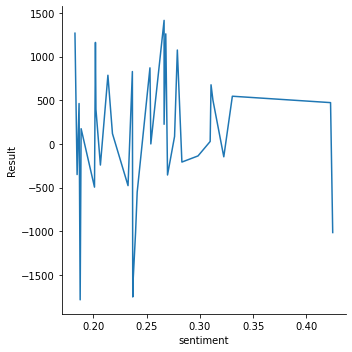

In [33]:
#week & result
sb.relplot(x="Date", y="Result", kind="line", data=allth)
sb.relplot(x="Date", y="sentiment", kind="line", data=week1)
sb.relplot(x="sentiment", y="Result", kind="line", data=concatenated1)

In [34]:
#week & percentage_change
print(week1)

all_the_dates2['Date'] = pd.to_datetime(all_the_dates2['Date'])

allth1 = all_the_dates2.groupby(pd.Grouper(key="Date", freq="1W")).mean()
print(allth1)

concatenated2 = allth1.merge(week1, on='Date', how='left')
print(concatenated2)

            sentiment
Date                 
2021-01-03   0.267986
2021-01-10   0.213650
2021-01-17   0.184727
2021-01-24   0.201058
2021-01-31   0.253956
2021-02-07   0.236626
2021-02-14   0.266403
2021-02-21   0.182714
2021-02-28   0.187597
2021-03-07   0.253121
2021-03-14   0.201945
2021-03-21   0.206597
2021-03-28   0.283117
2021-04-04   0.202408
2021-04-11   0.188498
2021-04-18   0.241142
2021-04-25   0.239607
2021-05-02   0.278846
2021-05-09   0.266412
2021-05-16   0.236985
2021-05-23   0.237145
2021-05-30   0.217920
2021-06-06   0.309668
2021-06-13   0.186567
2021-06-20   0.232541
2021-06-27   0.298272
2021-07-04   0.276235
2021-07-11   0.322455
2021-07-18   0.269627
2021-07-25   0.312256
2021-08-01   0.310478
2021-08-08   0.330502
2021-08-15   0.422704
2021-08-22   0.424731
            Percentage_change
Date                         
2021-01-03           4.235440
2021-01-10           2.352636
2021-01-17          -0.778437
2021-01-24          -1.269139
2021-01-31           0.11943

/var/folders/yf/97lsvtr12qg5vtp26f5f03040000gn/T/ipykernel_1205/1503676055.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_the_dates2['Date'] = pd.to_datetime(all_the_dates2['Date'])


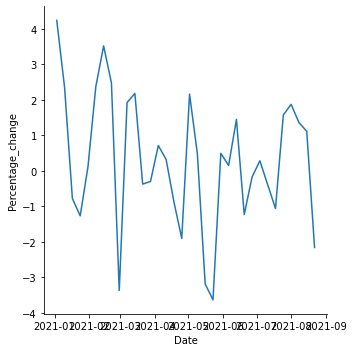

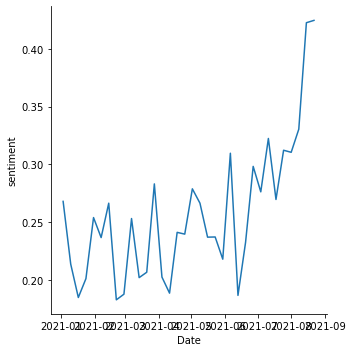

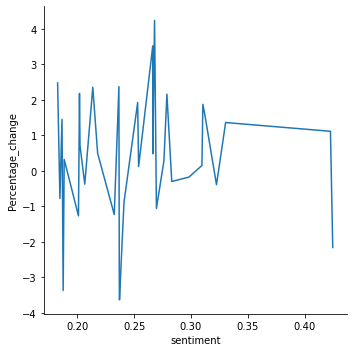

In [35]:
#week & percentage_change
sb.relplot(x="Date", y="Percentage_change", kind="line", data=allth1)
sb.relplot(x="Date", y="sentiment", kind="line", data=week1)
sb.relplot(x="sentiment", y="Percentage_change", kind="line", data=concatenated2)

In [36]:
#month & percentage_change
data['Date'] = pd.to_datetime(data['Date'])

month = data.groupby(pd.Grouper(key="Date", freq="1M")).mean()
month1 = month[["sentiment"]]
print(month1)

all_the_dates2['Date'] = pd.to_datetime(all_the_dates2['Date'])

allth3 = all_the_dates2.groupby(pd.Grouper(key="Date", freq="1M")).mean()
print(allth3)

concatenated3 = allth3.merge(month1, on='Date', how='left')
print(concatenated3)

            sentiment
Date                 
2021-01-31   0.218249
2021-02-28   0.216674
2021-03-31   0.223322
2021-04-30   0.218363
2021-05-31   0.256375
2021-06-30   0.256674
2021-07-31   0.305624
2021-08-31   0.365027
            Percentage_change
Date                         
2021-01-31           0.505735
2021-02-28           1.247759
2021-03-31           0.941784
2021-04-30          -0.016304
2021-05-31          -1.229427
2021-06-30          -0.081369
2021-07-31           0.599054
2021-08-31           0.722451
            Percentage_change  sentiment
Date                                    
2021-01-31           0.505735   0.218249
2021-02-28           1.247759   0.216674
2021-03-31           0.941784   0.223322
2021-04-30          -0.016304   0.218363
2021-05-31          -1.229427   0.256375
2021-06-30          -0.081369   0.256674
2021-07-31           0.599054   0.305624
2021-08-31           0.722451   0.365027


/var/folders/yf/97lsvtr12qg5vtp26f5f03040000gn/T/ipykernel_1205/4012999188.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_the_dates2['Date'] = pd.to_datetime(all_the_dates2['Date'])


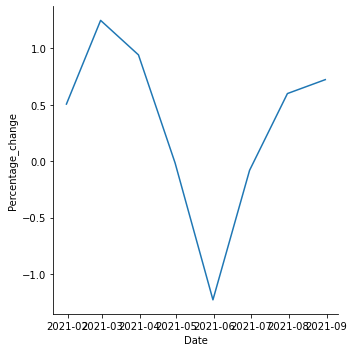

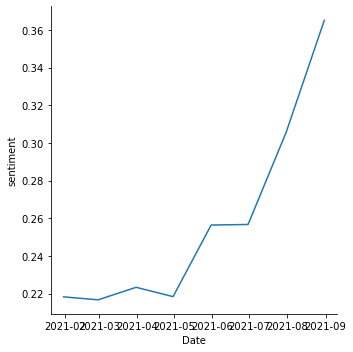

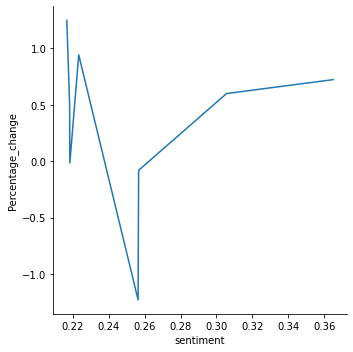

In [37]:
#month & percentage_change
sb.relplot(x="Date", y="Percentage_change", kind="line", data=allth3)
sb.relplot(x="Date", y="sentiment", kind="line", data=month1)
sb.relplot(x="sentiment", y="Percentage_change", kind="line", data=concatenated3)